## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Problem Statement ##

You are given a dataset containing:
    - a training set for a linear function
    - a test set for testing the learned hypothesis function
    
You will build a simple linear regression algorithm that can correctly identify the parameters of w0 and w1.


## 3 - Forward and Backward propagation ##

Forward Propagation:
- You get X
- You compute $h(x) = w_{1} * x + w_{0}$
- You calculate the loss function:  $$L(W) = \frac{1}{2m} \sum_{i=1}^{n} \left(h_{W}(x^{(i)})  - y^{(i)}\right)^2$$. 

Here are the two formulas you will be using: 

$$ dw_1 = \frac{\partial L}{\partial w_{1}} = \frac{1}{m} \sum_{i=1}^m (( w_{0} + w_{1} * x^{(i)} -y^{(i)}) * x^{(i)})\tag{1}$$
$$ dw_0 = \frac{\partial L}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^m (( w_{0} + w_{1} * x^{(i)} -y^{(i)}))\tag{2}$$

In [18]:
#Here we define a simplified neural network
class SimplifiedNetwork:
    def __init__(self):
        #the weight associated with the single feature, a scalar
        self.w_1 = 0 
        #bias, a scalar
        self.w_0 = 0
        
    def forward_back_propagation(self, X, Y):
        """
        This function forward and backward propagation
        Arguments:
        X -- data of the series of single feature
        Y -- true "label" vector

        Return:
        loss -- outcome of the loss function
        gradient -- dictionary containing dw_1 and dw_0

        """
        #number of training examples
        m = X.shape[1]
        mean = np.mean(X)
        print(mean)

        loss = 0 #loss
        dw_1 = 0 #gredient of w_1
        dw_0 = 0 #gredient of w_0

        #iterate through all the training examples to
        #    1. Calculate the loss
        #    2. calcuate the accumulated gradient dw_1 and dw_0
        for i in range(m):
            #Your code starts from here
            #Y_hat is output of the hypothesis function
            # Y_hat = self.w_0 + np.dot(self.w_1, X[i])
            Y_hat = self.w_0 + (self.w_1 * X[i])
            loss += (Y_hat - Y[i]) ** 2
            dw_1 += loss
            dw_0 += (loss * X[i])
            #Your code ends here

        #Use the accumulated loss and gredients to calculate the averaged counterparts
        loss = loss / (2 * m)
        dw_1 = dw_1 / m
        dw_0 = dw_0 /m


        gradients = {
            "dw_1": dw_1,
            "dw_0": dw_0
        }

        return gradients, loss
    
    
    #Function predict: 
    #   Predict the value using learned linear regression parameters (w_0, w_1)
    def predict(self, x):
        '''
        Predict the value using learned linear regression parameters (w_0, w_1)

        Arguments:
        X -- data set of single feature

        Returns:
        Y_prediction -- predictions for all items in X
        '''
        ## Your code starts here ##
        # Hint: You can use matrix/array operation. 
        # For example, if B is a matrix, 2 * B ends up with every item in matrix B being multiplied by 2

        A = np.dot(2, x) # NOT KNOW WHAT GOES HERE ???
        
        ## Your code ends here ##
        return A

    
    def get_weights(self):
        weights = {
            'w_1': self.w_1,
            'w_0': self.w_0
        }
        return weights


    def fit(self, X, Y, epochs=1, learning_rate = 0.01, print_loss = True):
        """
        This function optimizes w_1 and w_0 by running a gradient descent algorithm

        Arguments:
        X -- data of the single feature
        Y -- true "label" vector (Targeted output I think)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_loss -- True to print the loss every 100 steps

        Returns:
        params -- dictionary containing the weights w_1 and bias w_0
        grads -- dictionary containing the gradients of the weights and bias with respect to the loss function
        losss -- list of all the losss computed during the optimization, this will be used to plot the learning curve.

        Tips:
        You need to finish the following steps:
            1) Calculate the loss and gradients for the current parameters. Use forward_back_propagation().
            2) Update the parameters using gradient descent rule for w_0 and w_1.
        """
        losss = []
        for i in range(epochs):
            ##Your code starts from here##
            gradients, loss = self.forward_back_propagation(X, Y)

            dw_1 = gradients['dw_1']
            dw_0 = gradients['dw_0']

            self.w_1 = self.w_1 - (learning_rate * dw_1)
            self.w_0 = self.w_0 - (learning_rate * dw_0)
            ##Your code ends here##


            # Print the loss every 100 training examples
            if print_loss and i % 100 == 0:
                losss.append(loss)
                print ("loss after iteration %i: %f" %(i, loss))

            

        params = {
            "w_1": self.w_1,
            "w_0": self.w_0
        }

        gradients = {
            "dw_1": dw_1,
            "dw_0": dw_0
        }

        return params, gradients, losss

In [19]:
def Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 2000, learning_rate = 0.5, print_loss = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_loss -- Set to true to print the loss every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    model = SimplifiedNetwork()
    parameters, grads, losses = model.fit(X_train, Y_train, epochs, learning_rate, print_loss)
    
    Y_prediction_test = model.predict(X_test)
    Y_prediction_train = model.predict(X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w_1" : model.get_weights()['w_1'], 
         "w_0" : model.get_weights()['w_0'],
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

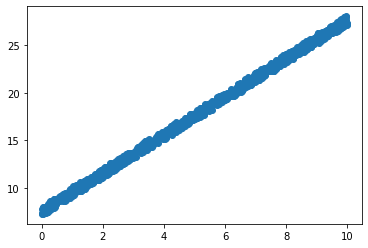

In [20]:
df = pd.read_csv('train.csv', header=None)

X_train = df[0].values.reshape(-1, 1).T
Y_train = df[1].values.reshape(-1, 1).T

df_test = pd.read_csv('test.csv', header=None)
X_test = df_test[0].values.reshape(-1, 1).T
Y_test = df_test[1].values.reshape(-1, 1).T


plt.scatter(X_train, Y_train)
plt.show()

In [21]:
d = Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 1000, learning_rate = 0.01, print_loss = True)
print("w_1 is " + str(d['w_1']) + " and w_0 is " + str(d['w_0']))

# Plot learning curve (with losses)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

5.1038628


IndexError: ignored